# Исследование рынка компьютерных игр

**Цель проекта**


Исследование проводится с целью планирования рекламной кампании видеоигр на следующий год. Главной задачей проекта является выдача рекомендаций для грядущей рекламной кампании. Необходимо определить актуальный период, на основании которого будет возможно прогнозировать популярность отдельных продуктов. Также будут рассмотрены распределения данных по различным платформам/регионам/жанрам, дополнительно будут проверены несколько гипотез.

**Исходные данные**


Используемый массив данных -- это исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы из открытых источникв. Массив данных передан в виде файла типа `.csv`

## План работ

- Чтение данных и первичный анализ массива данных
- Предобработка данных
    - Работа с пропусками
    - Преобразование типов данных
    - Обработка неявных/явных дубликатов
    - Изучение аномальных значений
- Исследовательский анализ данных
    - Динамика выхода игр во времени
    - Средний цикл "жизни" платформ
    - Определение актуального периода для прогноза
    - Анализ коммерческой успешности платформ
    - Влияние отзывов на количество продаж
    - Анализ коммерческой успешности жанров
- Составление портрета среднего игрока по регионам
    - Распределение по платформам
    - Распределение по жанрам
    - Распределение по возрастному рейтингу
- Проверка гипотез
    - Рейтинг `Xbox One` равен рейтингу `PC`
    - Рейтинг `Action` равен рейтингу `Sports`
- Общий вывод

## Чтение данных и импорт библиотек

In [1]:
# pandas
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# other
import numpy as np
from scipy import stats as st

In [2]:
# reading from local file
df = pd.read_csv('/Users/ilatti/Documents/practicum/5_fifth_sprint/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


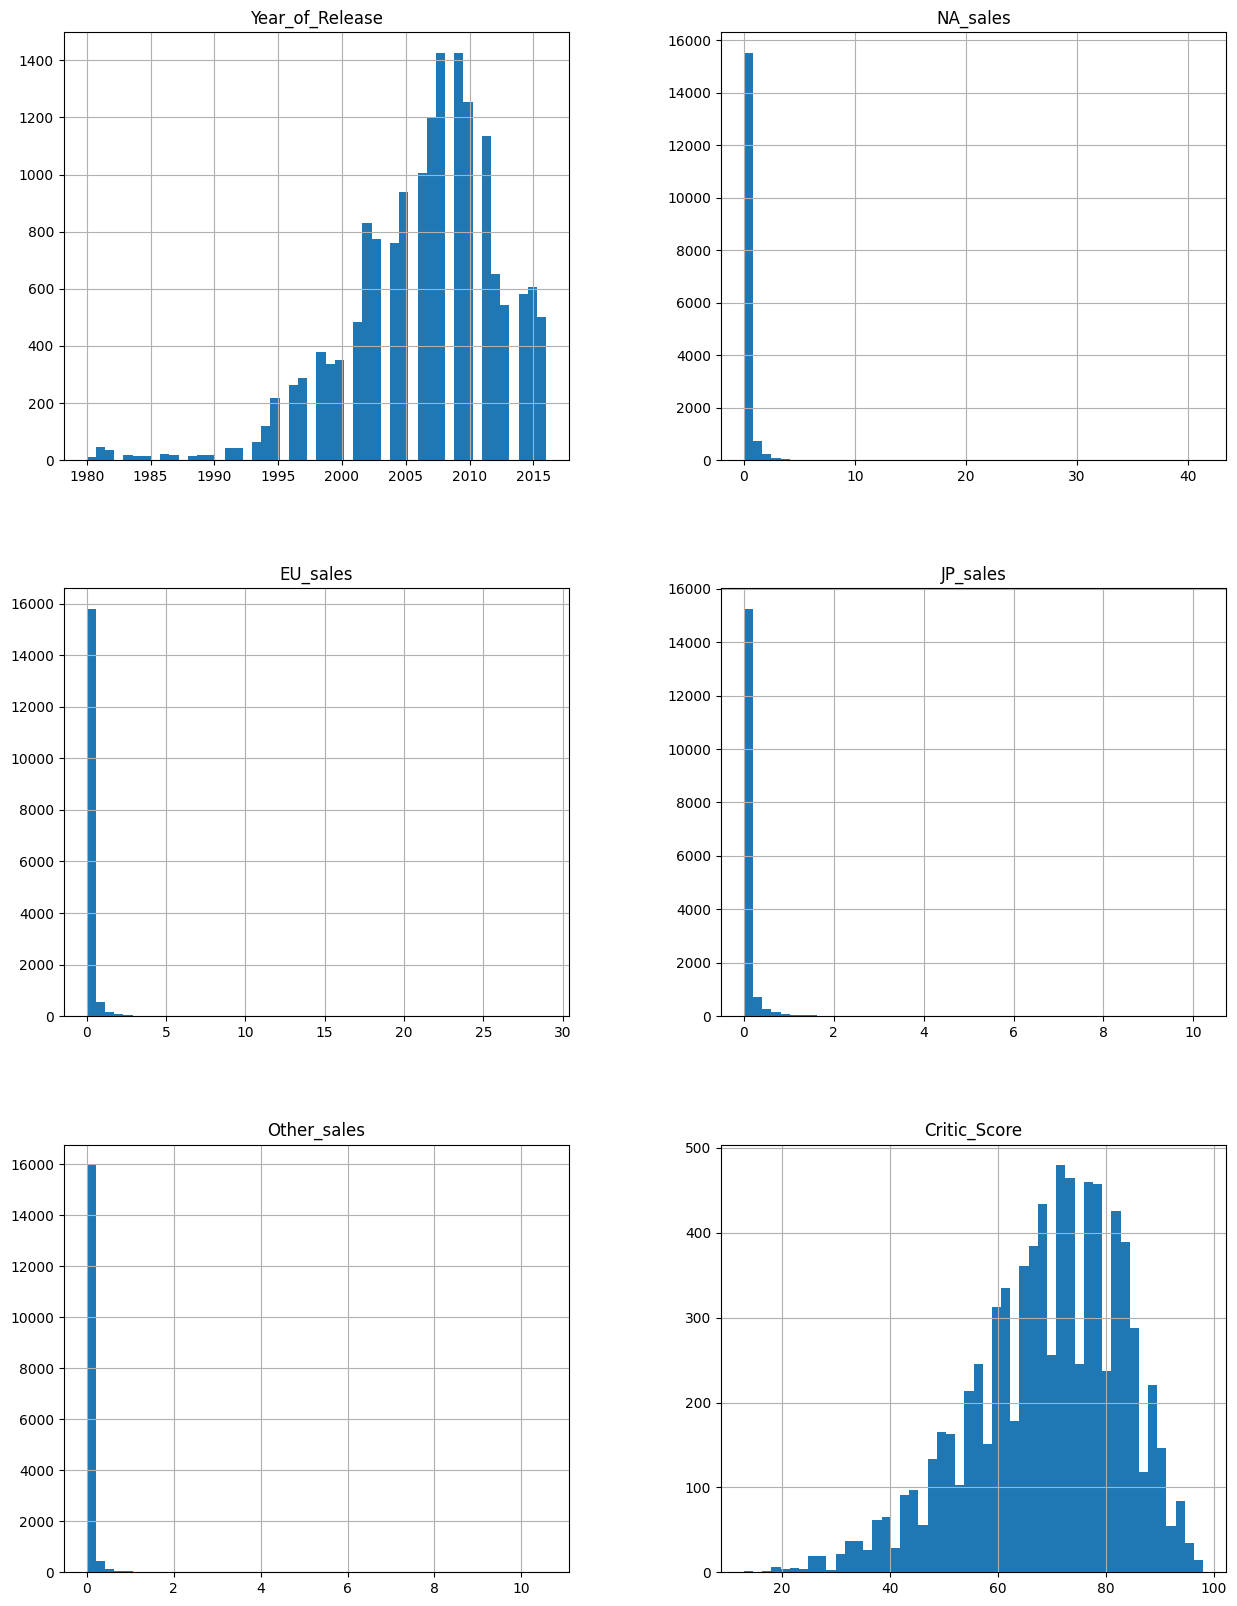

In [5]:
df.hist(figsize=(15, 20), bins=50);

**Вывод**: 

- Данные считались корректно: в датафрейме 11 столбцов и 16.7 тыс. строк
- Названия столбцов следует переформатировать
- Типы данных столбцов `Year_of_Release` `Critic_Score` `User_Score` не соответствуют хранящимся в них данным
- В столбцах есть пропуски, необходимо рассмотреть подробнее

## Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df.query('name.isna()').shape[0]

2

In [8]:
df.query('year_of_release.isna()').shape[0]

269

Удалим строки без имени игры или без год релиза -- таких строк очень мало. Это позволит изменить тип данных в столбце года на целочисленный

In [9]:
df = df.query('name.isna() == False and year_of_release.isna() == False')

In [10]:
df.query('name.isna()').shape[0]

0

In [11]:
df.query('year_of_release.isna()').shape[0]

0

In [12]:
df.shape[0]

16444

Лишние данные не потеряны, целевые строки удалены

In [13]:
df.year_of_release = df.year_of_release.astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


`critic_score` логичнее было бы перевести в `int`, но там встречаются пропуски, оставляем в виде `float`

На первый взгляд `user_score` не должен быть типом `object`, посмотрим подробнее:

In [15]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df.query('user_score == "tbd"').user_score.count()

2376

Строковый тип у пользовательского рейтинга из-за значения `tbd = to be defined`, то есть это пропуск, но о котором что-то известно; какое соотношение между обычными пропусками и `tbd`?

In [17]:
df.user_score.isna().sum()

6605

Примерно четверть всех пропусков помечается как `tbd`, для нашего исследования дополнительной информации это не несет, заменим значения пустыми и изменим тип данных на более подходящий

In [18]:
df.user_score = df.user_score.replace('tbd', np.NaN)
df.user_score = df.user_score.astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Типы данных приведены в соответствие, работа с пропусками проведена -- оставшиеся пропуски оставим как есть, поскольку заполнять рейтинги синтетическим путем было бы неверно -- у нас нет данных, с помощью которых это можно сделать

Изучим возрастные рейтинги подробнее:

In [20]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Нужно провести замены: `K-A (Kids-Adults)` и `EC (Early Childhood)` заменим на `E (Everyone)`, первые два названия устарели и не используются, их заменила категория `E`

`RP (Rating Pending)` заменим пустыми значениями, поскольку по смыслу это одно и тоже -- у игры нет установленного возрастного рейтинга, эта информация не имеет ценности в нашем случае

In [21]:
df.rating = df.rating.replace(['K-A', 'EC'], 'E')
df.rating = df.rating.replace('RP', np.NaN)
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO'], dtype=object)

Рассмотрим частотность конкретных значений рейтинга:

In [22]:
df.rating.value_counts()

E       3932
T       2905
M       1536
E10+    1393
AO         1
Name: rating, dtype: int64

Рейтинг `AO` встречается всего один раз, имеет смысл удалить строку с таким значением:

In [23]:
df = df.query('rating != "AO"')
df.rating.value_counts()

E       3932
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

Пропуски в рейтинге заполним фиксированным значением

In [24]:
df.rating = df.rating.fillna('NoRating')
df.rating.value_counts()

NoRating    6677
E           3932
T           2905
M           1536
E10+        1393
Name: rating, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [26]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В представленных платформах нет неявных дубликатов, все названия уникальные

In [27]:
df.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявных дубликатов в названиях жанров также не обнаружено

Рассмотрим аномальные значения числовых показателей:

In [28]:
(
    df[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',  
        'critic_score', 'user_score']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,"16,443.00","16,443.00","16,443.00","16,443.00","16,443.00","7,982.00","7,462.00"
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70
median,"2,007.00",0.08,0.02,0.00,0.01,71.00,7.50


In [29]:
df_anomaly_stat = (
    df[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',  
        'critic_score', 'user_score']]
    .quantile([0.0012, 0.01, .99, .9988]
    ) # выбираем размах в 0,9976 квантилей 
)
df_anomaly_stat.style.format("{:,.4f}")

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0.001200,"1,981.0000",0.0000,0.0000,0.0000,0.0000,20.0000,0.6953
0.010000,"1,987.0000",0.0000,0.0000,0.0000,0.0000,31.8100,2.3610
0.990000,"2,016.0000",2.8058,1.9458,1.2758,0.6400,94.0000,9.2000
0.998800,"2,016.0000",9.0181,5.7354,3.9977,1.9408,97.0000,9.4000


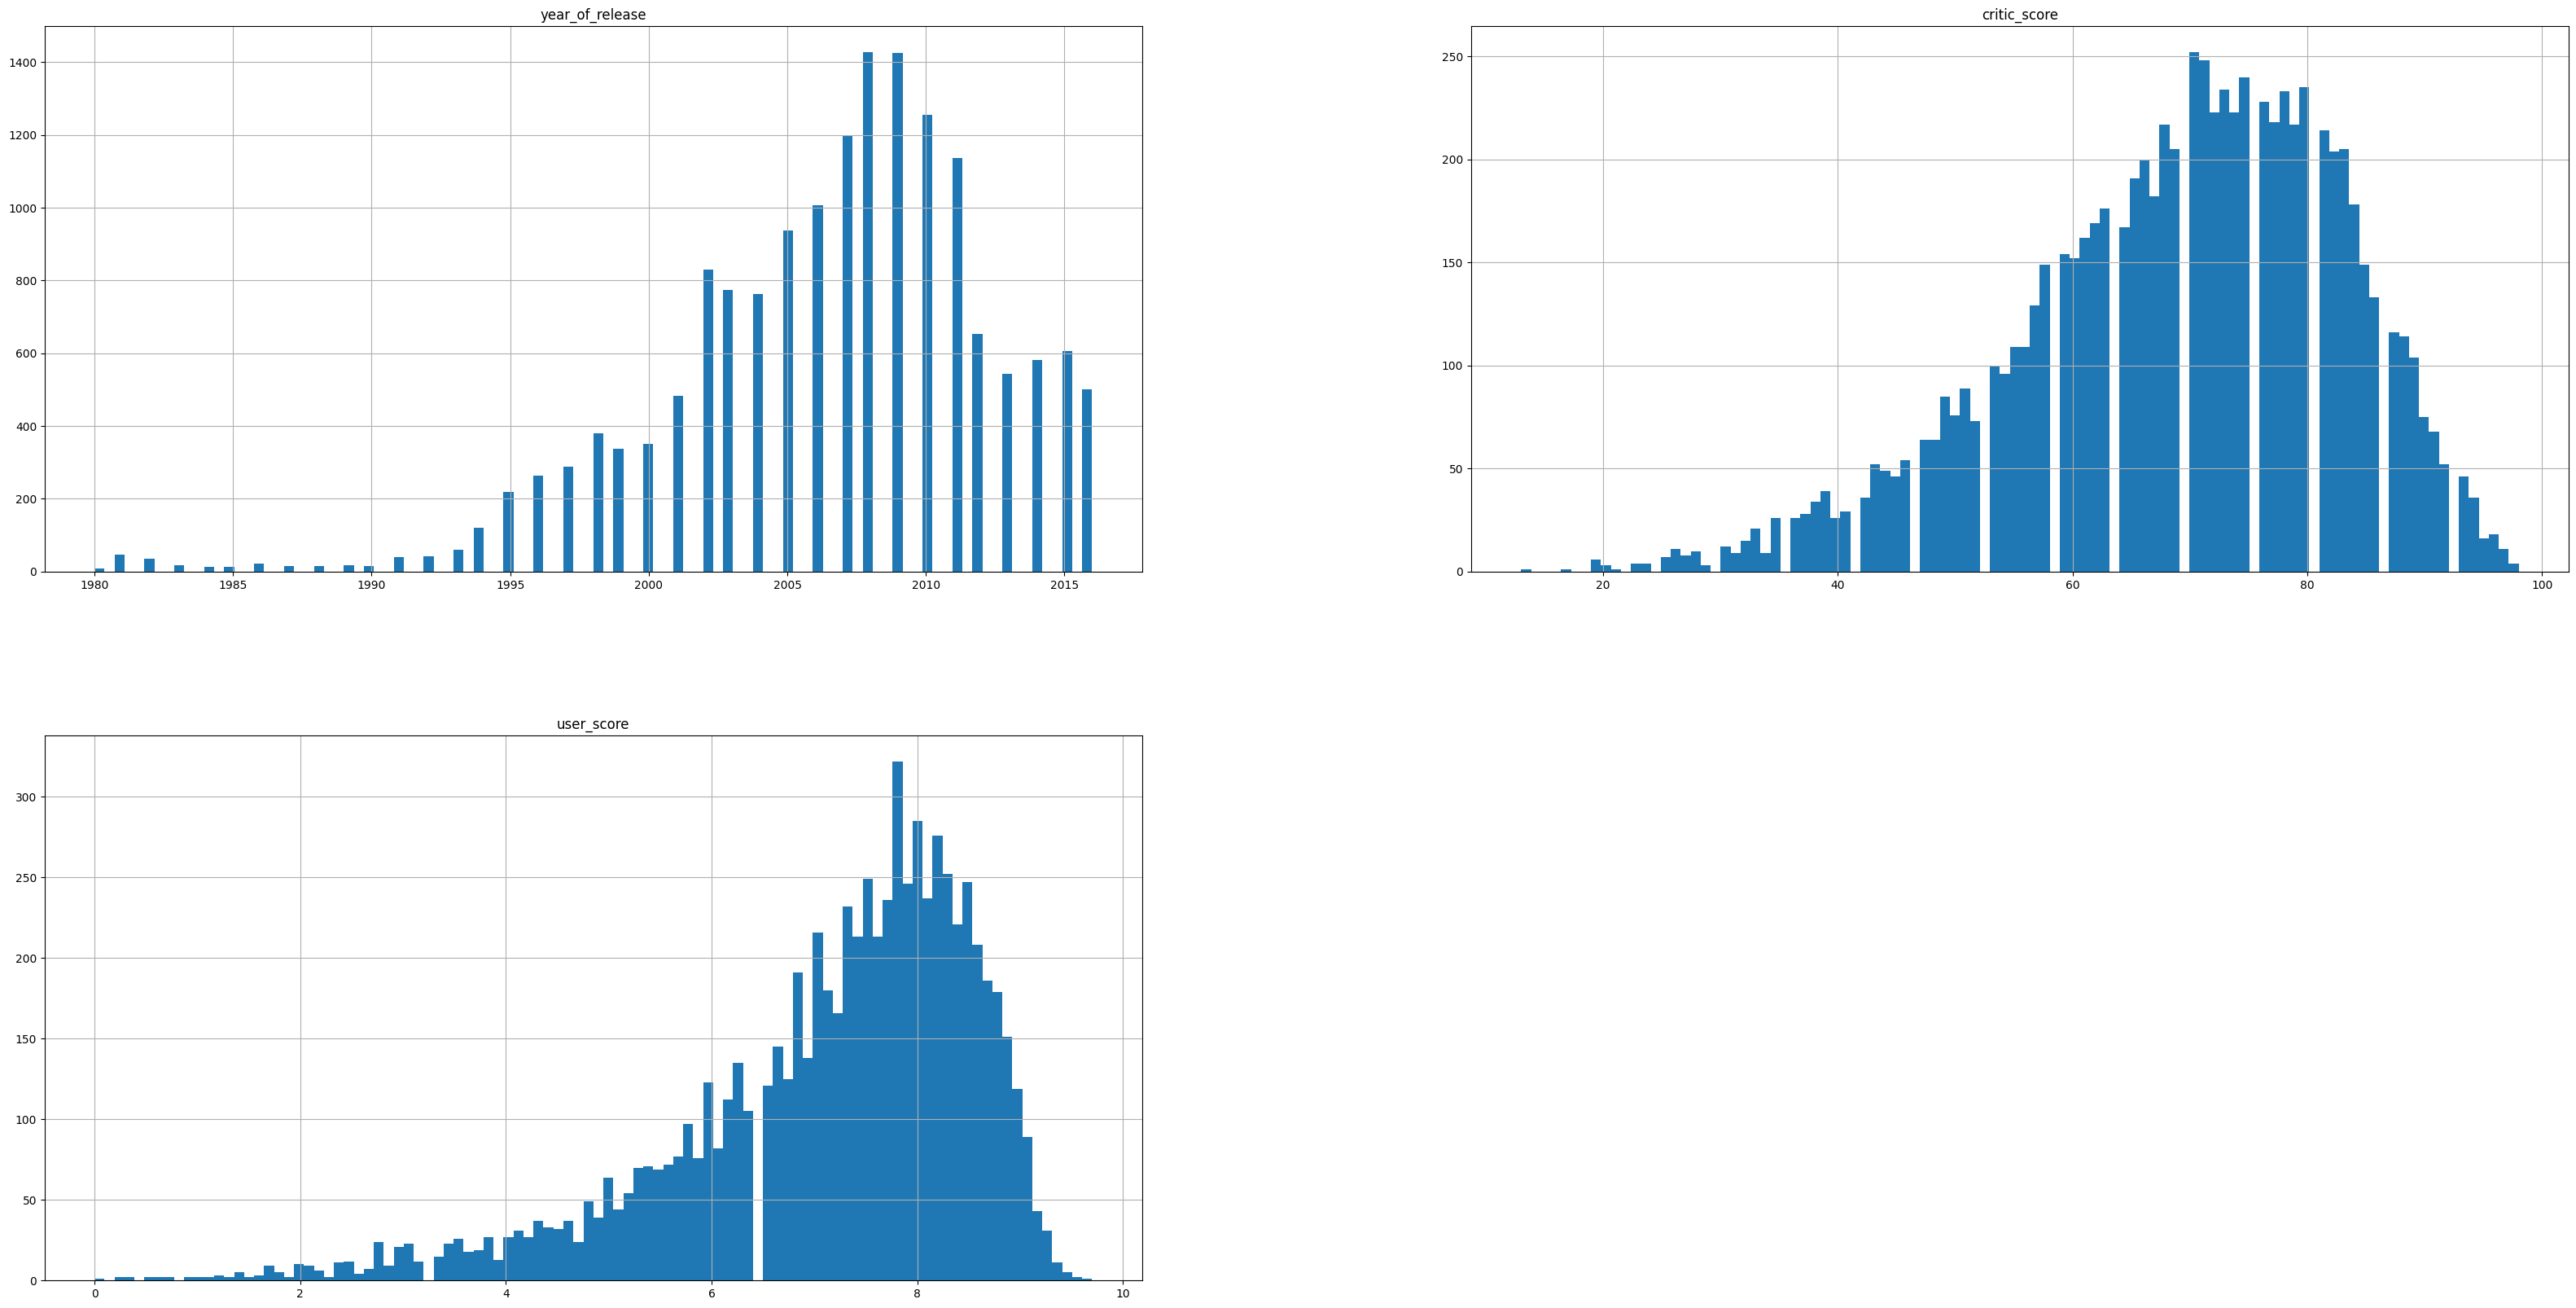

In [30]:
df[['year_of_release','critic_score', 'user_score']].hist(figsize=(40, 20), bins=100);

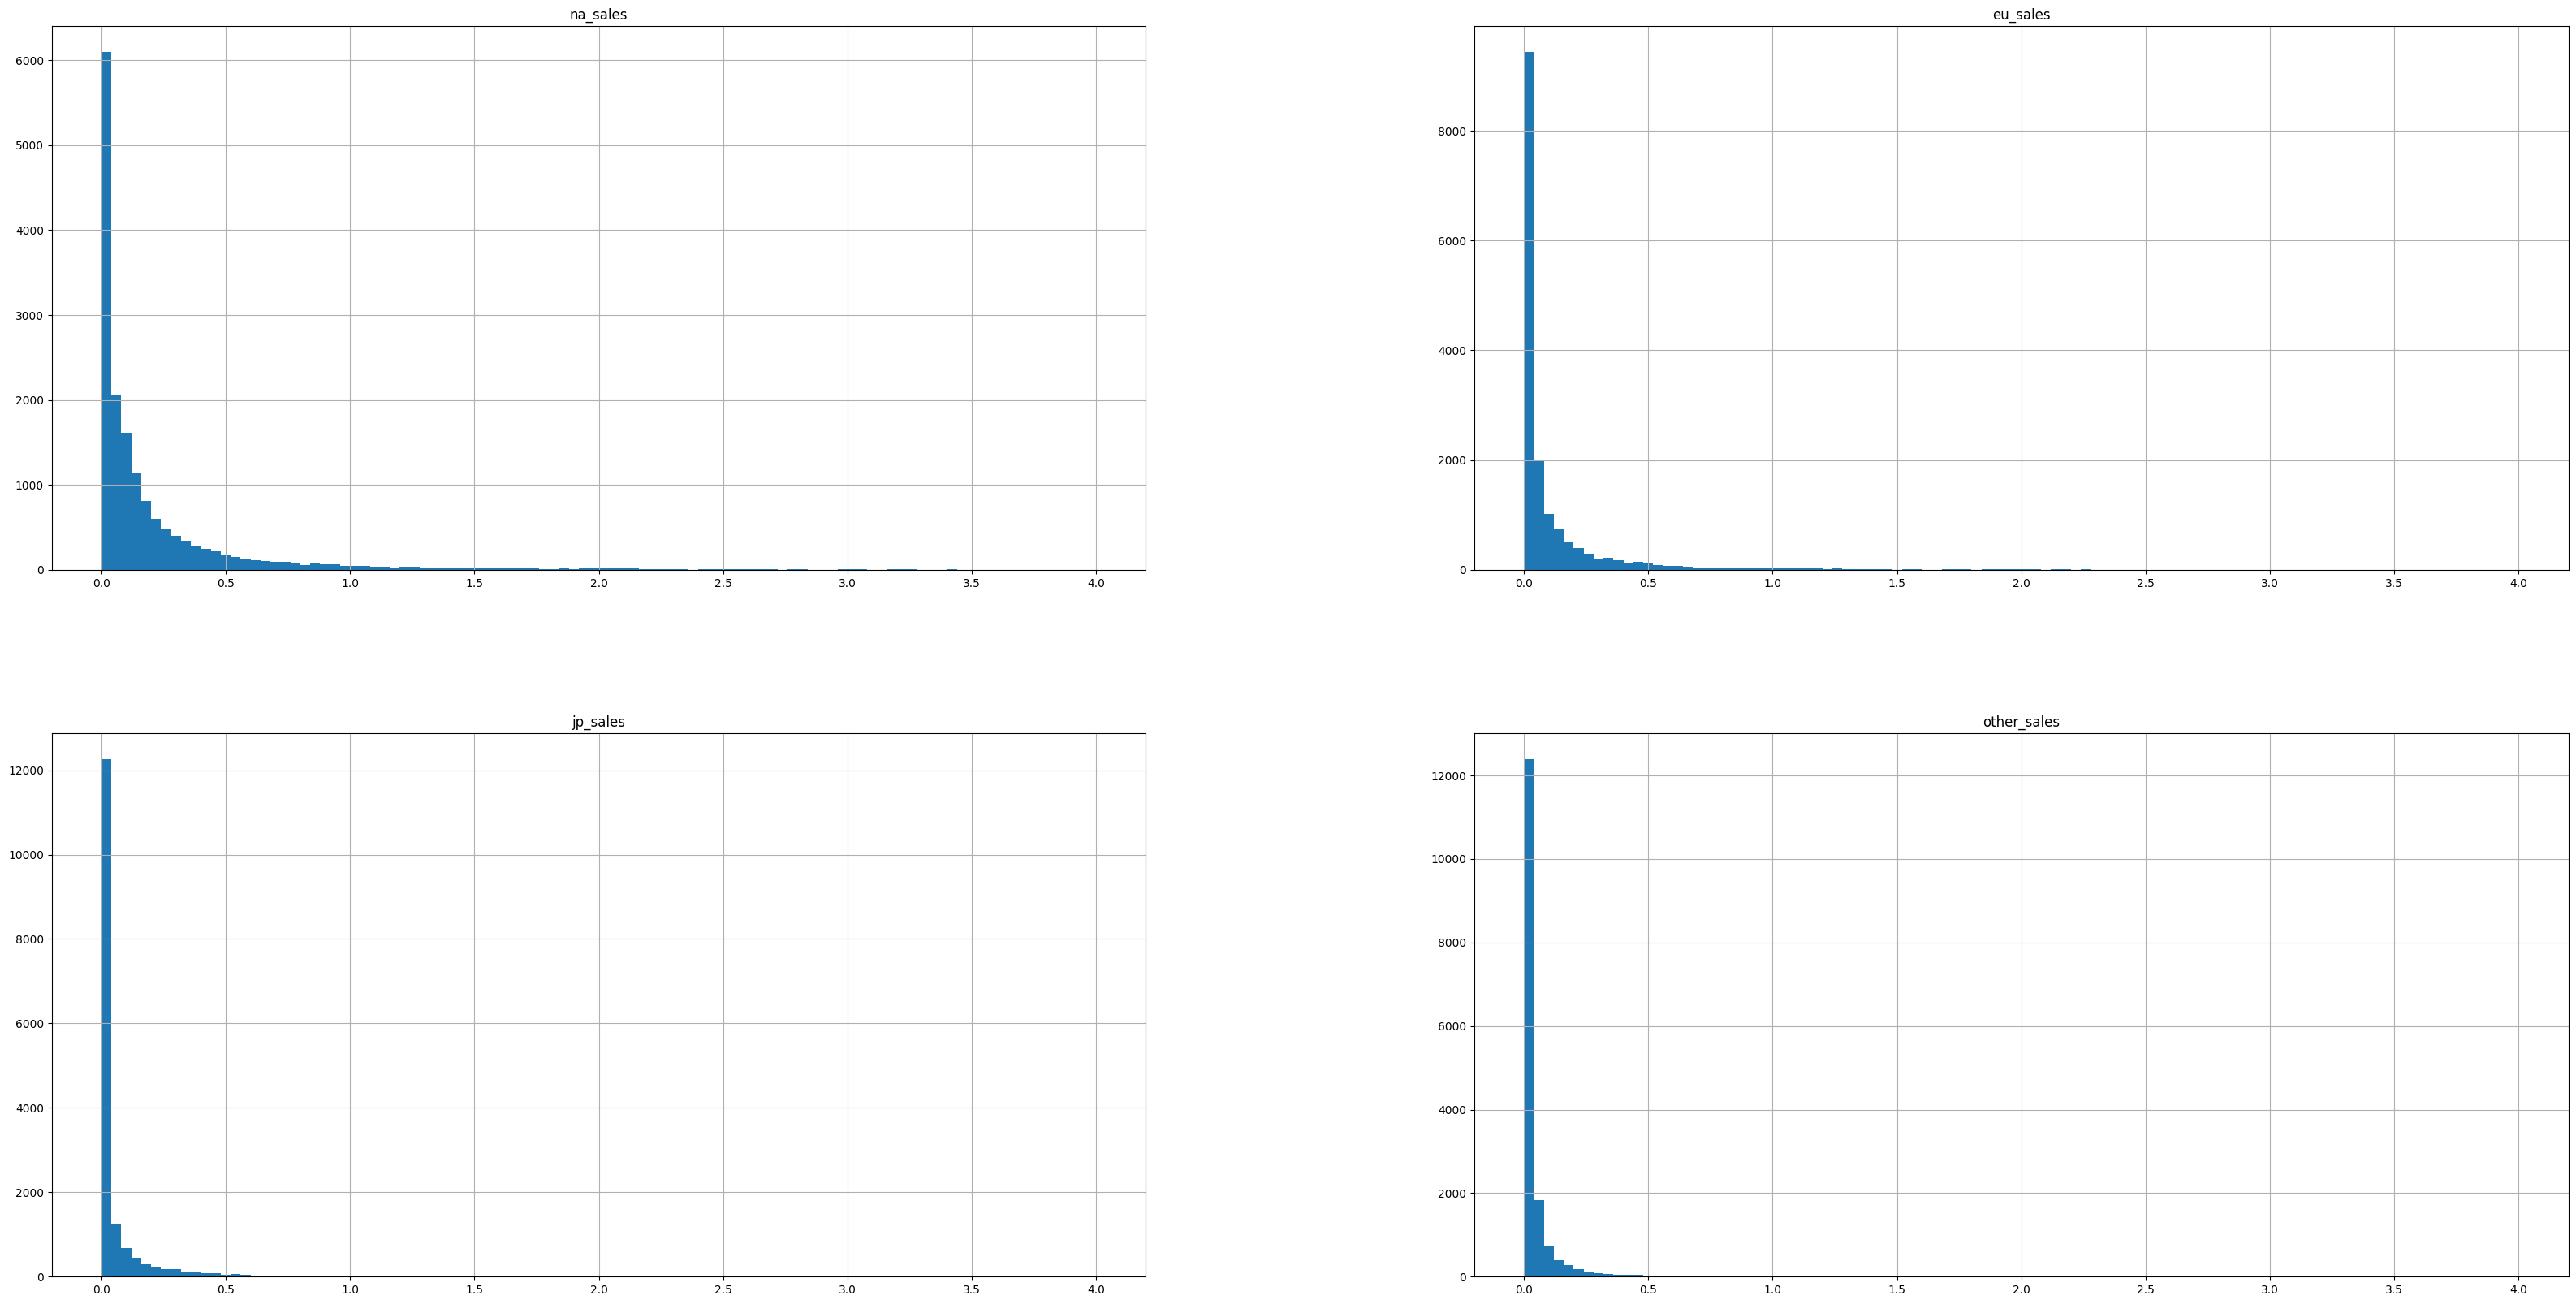

In [31]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].hist(figsize=(40, 20), bins=100, range=(0, 4));

Аномальных значений не обнаружено

Проверим наличие явных дубликатов:

In [32]:
df.duplicated().sum()

0

Подсчитаем суммарные продажи по миру для каждой игры:

In [33]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NoRating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NoRating,31.38


### **Вывод**


В ходе предобработки данных проделано следующее:


- Названия столбцов приведены к нижнему регистру
- Удалены строки без имени игры или без года релиза
- В столбце `user_score` значения `tbd` заменены пустыми значениями
- В столбце `user_score` тип данных изменен с `object` на `float`
- Тип данных столбца `year_of_release` изменен с `float` на `int`
- Произведены замены устаревших рейтингов (`K-A` и `EC`)
- Пропуски в значениях возрастного рейтинга заполнены значением `NoRating`
- Единственное значение возрастного рейтинга `RP` заменено на пустое значение
- Проведена проверка на неявные/явные дубликаты и аномальные значения -- значений не обнаружено
- Рассчитаны суммарные продажи по миру для каждой игры как сумма продаж по регионам


## Исследовательский анализ данных

Рассмотрим динамику выхода игр по годам:

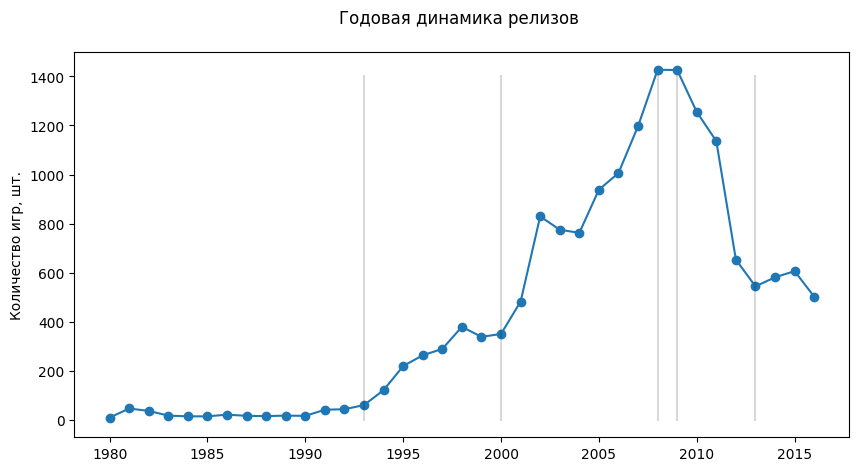

In [34]:
x = df.groupby('year_of_release')['year_of_release'].count().index.tolist()
y = df.groupby('year_of_release')['year_of_release'].count().tolist()
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o');
plt.plot([1993, 1993], [0, 1400], color='black', alpha=.15);
plt.plot([2000, 2000], [0, 1400], color='black', alpha=.15);
plt.plot([2008, 2008], [0, 1400], color='black', alpha=.15);
plt.plot([2009, 2009], [0, 1400], color='black', alpha=.15);
plt.plot([2013, 2013], [0, 1400], color='black', alpha=.15);
plt.title('Годовая динамика релизов \n');
plt.ylabel('Количество игр, шт.');


Видим шесть интервалов во времени:

1) Стабильно низкий уровень **1980-1993**
2) Значительный рост **1994-2000**
3) Взрывной рост **2001-2007**
4) Плато максимального количества выходивших игр **2008-2009**
5) Драматическое падение **2010-2012**
6) Постепенный рост **2013-2016**, провал 2016 года объясняется неполными данными до конца года

С целью прогнозирования 2017-го года необходимо настраиваться на последний, шестой, интервал

count   31.00
mean     7.61
std      7.00
min      0.00
25%      3.00
50%      6.00
75%     10.00
max     31.00
Name: length_gen, dtype: float64

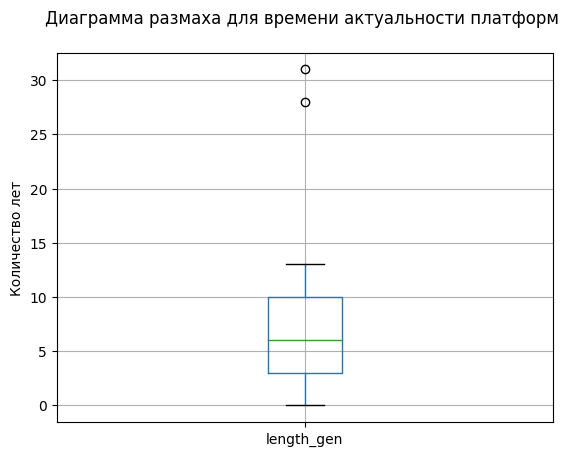

In [35]:
platform_pivot = (df.pivot_table(index=['platform'], 
                                 values='year_of_release', 
                                 aggfunc=['count', 'min', 'max'])
                 )

platform_pivot.columns=['games_total', 'first_year_gen', 'last_year_gen']
platform_pivot = platform_pivot.sort_values(by='games_total', ascending=False)
platform_pivot['length_gen'] = platform_pivot.last_year_gen - platform_pivot.first_year_gen

platform_pivot.boxplot('length_gen');
plt.title('Диаграмма размаха для времени актуальности платформ \n')
plt.ylabel('Количество лет')
platform_pivot.length_gen.describe()

Медианное время "жизни" платформы составляет шесть лет

In [36]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Топ-5 платформ с наибольшими суммарными продажами в предоставленной базе:


`PS2` `X360` `PS3` `Wii` `DS`		

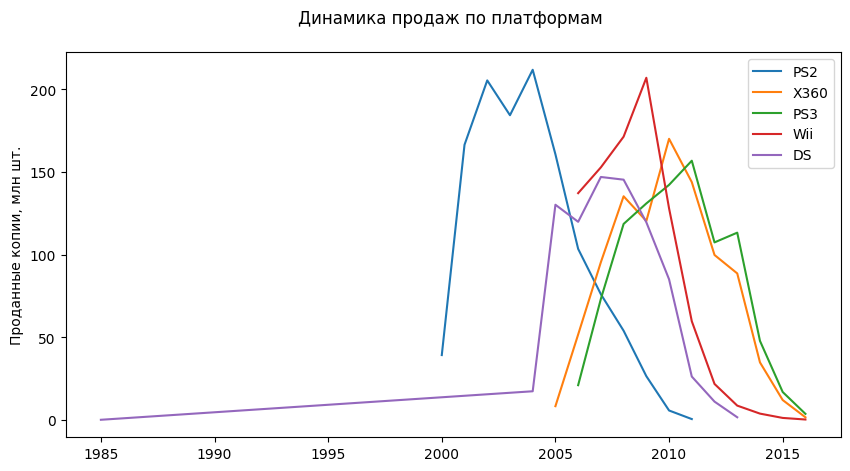

In [37]:
top_5_sellers = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

for i in top_5_sellers:
    pivot_i = (df.query('platform == @i')
                 .pivot_table(index='year_of_release', 
                              values='total_sales', 
                              aggfunc='sum'))
    
    ax.plot(pivot_i.index, pivot_i['total_sales'], label = i)
   
ax.set_title('Динамика продаж по платформам \n')
ax.set_ylabel('Проданные копии, млн шт.')
ax.legend()
plt.show;

Год выхода консоли `DS` -- 2004, значение в 1985 году -- аномалия

In [38]:
df.query('platform == "DS"').sort_values(by='year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NoRating,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.00,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,NoRating,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,NaN,NaN,NoRating,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NoRating,0.19


Избавимся от аномалии:

In [39]:
df = df.query('name != "Strongest Tokyo University Shogi DS"')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16442 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


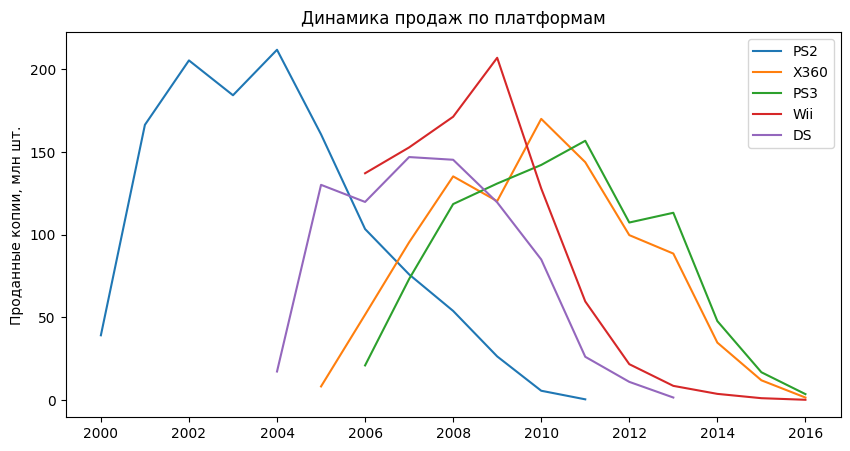

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

for i in top_5_sellers:
    pivot_i = (df.query('platform == @i')
                 .pivot_table(index='year_of_release', 
                              values='total_sales', 
                              aggfunc='sum'))
    
    ax.plot(pivot_i.index, pivot_i['total_sales'], label = i)
    
ax.set_title('Динамика продаж по платформам')
ax.set_ylabel('Проданные копии, млн шт.')
ax.legend()
plt.show;

Актуальным периодом назовем период с 2015 по 2016 год (два ближайших года последнего интервала) 

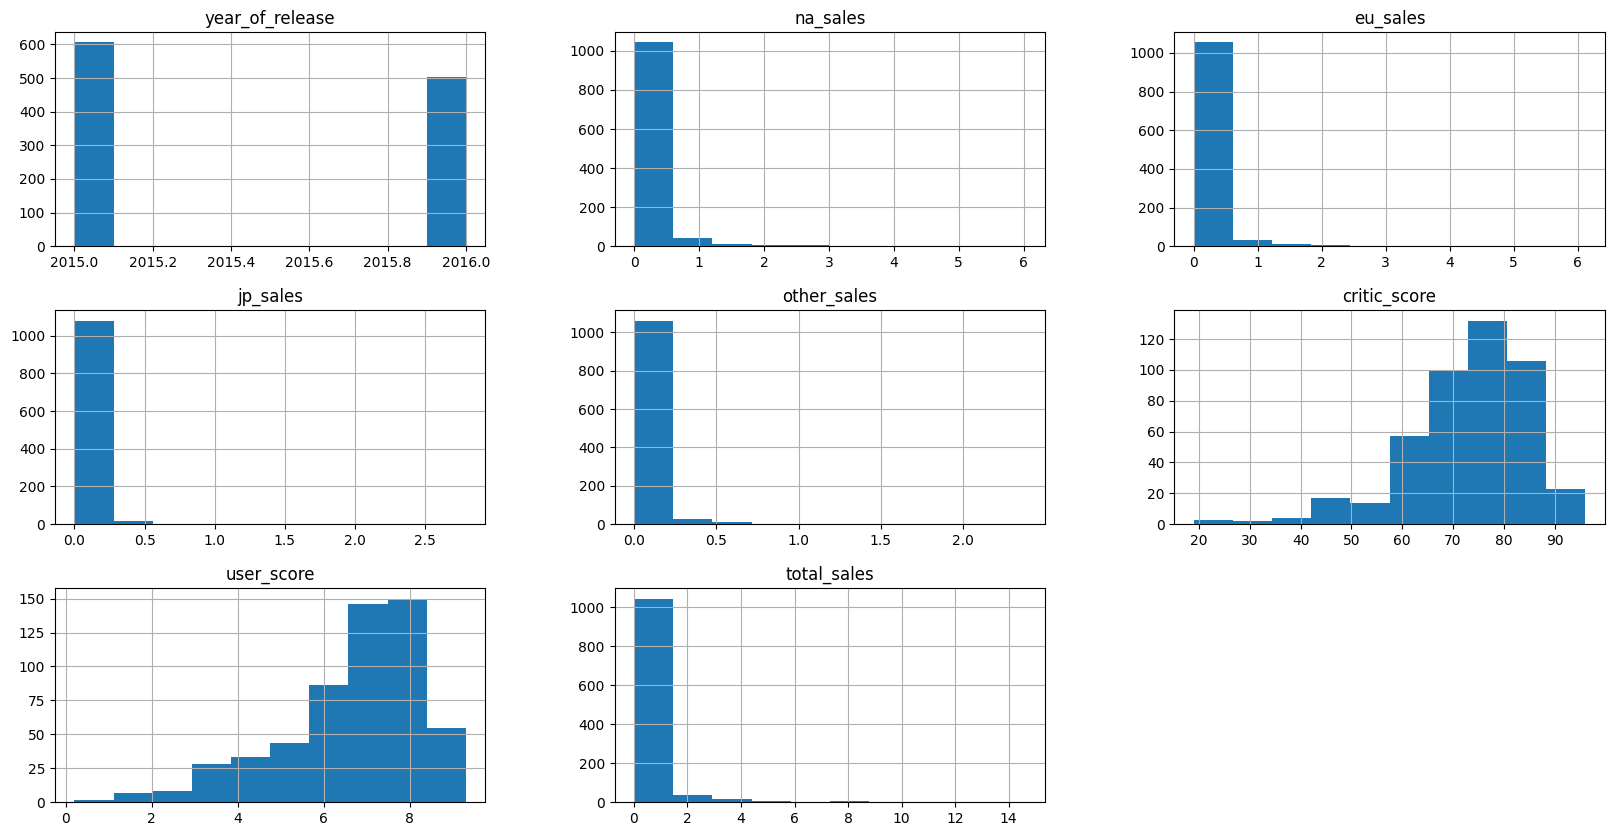

In [41]:
df_actual = df.query('year_of_release >= 2015')
df_actual.hist(figsize=(20, 10));

In [42]:
df_actual.platform.unique()

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

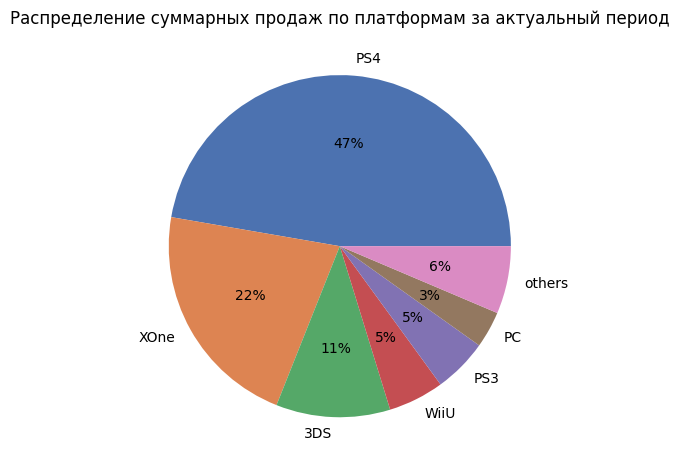

Совокупные продажи игр по году, млн копий


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [43]:
platforms_share = (df_actual
 .groupby('platform', as_index=False)['total_sales']
 .sum()
 .sort_values(by='total_sales', 
              ascending=False)
 .reset_index(drop=True))


other_platforms = platforms_share.loc[6:, 'total_sales'].sum()
platforms_share = platforms_share.loc[:5, :]
platforms_share.loc[6, 'platform'] = 'others'
platforms_share.loc[6, 'total_sales'] = other_platforms

fig, ax = plt.subplots()
fig.set(tight_layout=True);
colors = sns.color_palette('deep')
ax.pie(platforms_share.total_sales, labels=platforms_share.platform, colors=colors, autopct='%1.0f%%')
ax.set(ylabel=None, title='Распределение суммарных продаж по платформам за актуальный период')

plt.show()

print('Совокупные продажи игр по году, млн копий')
(
df_actual
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

Ожидаемо, лидируют в рейтинге суммарных продаж за актуальный период самые современные консоли от Sony: `PS4`, Microsoft: `XOne` и Nintendo: `3DS`, `WiiU`. Также видны традиционно низкие продажи на ПК относительно консолей

Наиболее перспективно выглядят платформы `PS4`, `XOne` `3DS` `PC` `WiiU`: они занимают значительную долю рынка и продажи игр по ним составляют не менее 15 млн копий в год

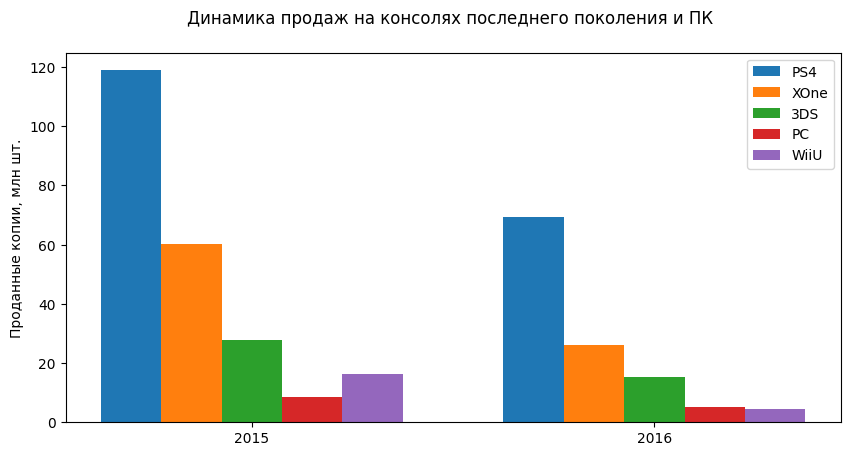

In [44]:
fig, ax = plt.subplots()
offset = -0.3

for i in ['PS4', 'XOne', '3DS', 'PC', 'WiiU']:
    pivot_i = (df_actual.query('platform == @i')
                 .pivot_table(index='year_of_release', 
                              values='total_sales', 
                              aggfunc='sum'))
    
    ax.bar(pivot_i.index + offset, pivot_i['total_sales'], label = i, width = 0.15)
    offset += 0.15
    
ax.legend()
ax.set_xticks([2015, 2016])
fig.set_figwidth(10)
ax.set_title('Динамика продаж на консолях последнего поколения и ПК \n')
ax.set_ylabel('Проданные копии, млн шт.')
plt.show()

Наиболее выгодно вложение в рекламу игр на `PS4`, `XOne` и `3DS`. Также можно рекомендовать `PC`, несмотря на небольшую долю рынка -- персональные компьютеры никуда не исчезнут, а значит и игры на них будут пользоваться спросом

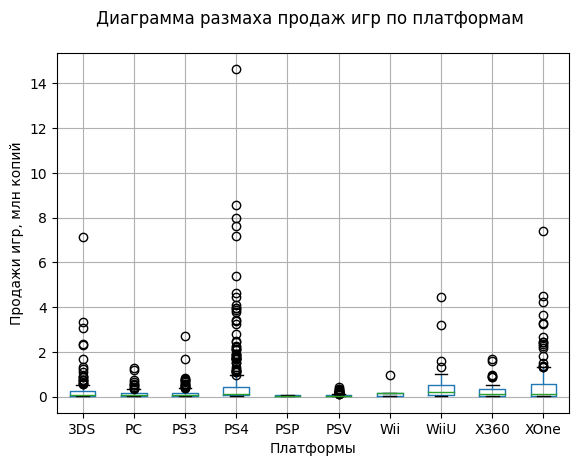

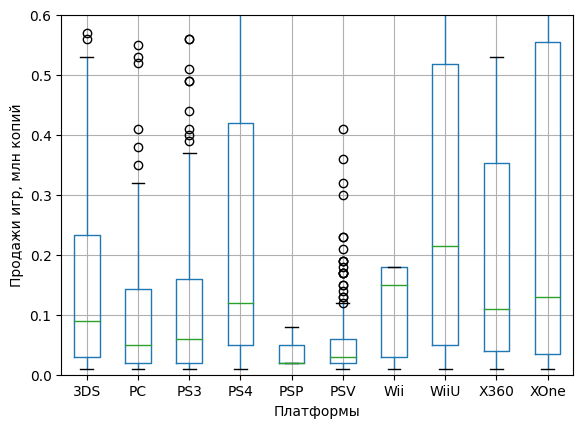

In [45]:
df_actual.boxplot(column='total_sales', by='platform')
plt.title('Диаграмма размаха продаж игр по платформам \n')
plt.suptitle(None)
plt.ylabel('Продажи игр, млн копий')
plt.xlabel('Платформы')
plt.show()


df_actual.boxplot(column='total_sales', by='platform')
plt.title(None)
plt.suptitle(None)
plt.ylabel('Продажи игр, млн копий')
plt.xlabel('Платформы')
plt.ylim(0, 0.6)
plt.show()

- У `PS4` явное преимущество в контексте общих продаж, но если рассматривать распределение этих продаж, то видим, что это преимущество обеспечено небольшим количеством игр: у `PS4` самые большие по величине выбросы некоторого количества очень успешных игр
- У приставки `WiiU` величина .75-квантиля больше, чем у `PS4`, медиана также больше, а .25-квантиль на том же уровне, вложение в `WiiU` выглядит менее статистически рискованным в сравнении с `PS4`
- `XOne` также показывают величина .75-квантиля больше, чем у `PS4`, медиана примерно на том же уровне, а .25-квантиль немного меньше, продвижение игр на `XOne` также выглядит менее рискованным в сравнении с `PS4`

Таким образом, рейтинг предпочтительности продвижения платформ:
1) `WiiU`
2) `XOne`
3) `PS4`
4) `3DS`
5) `PC`

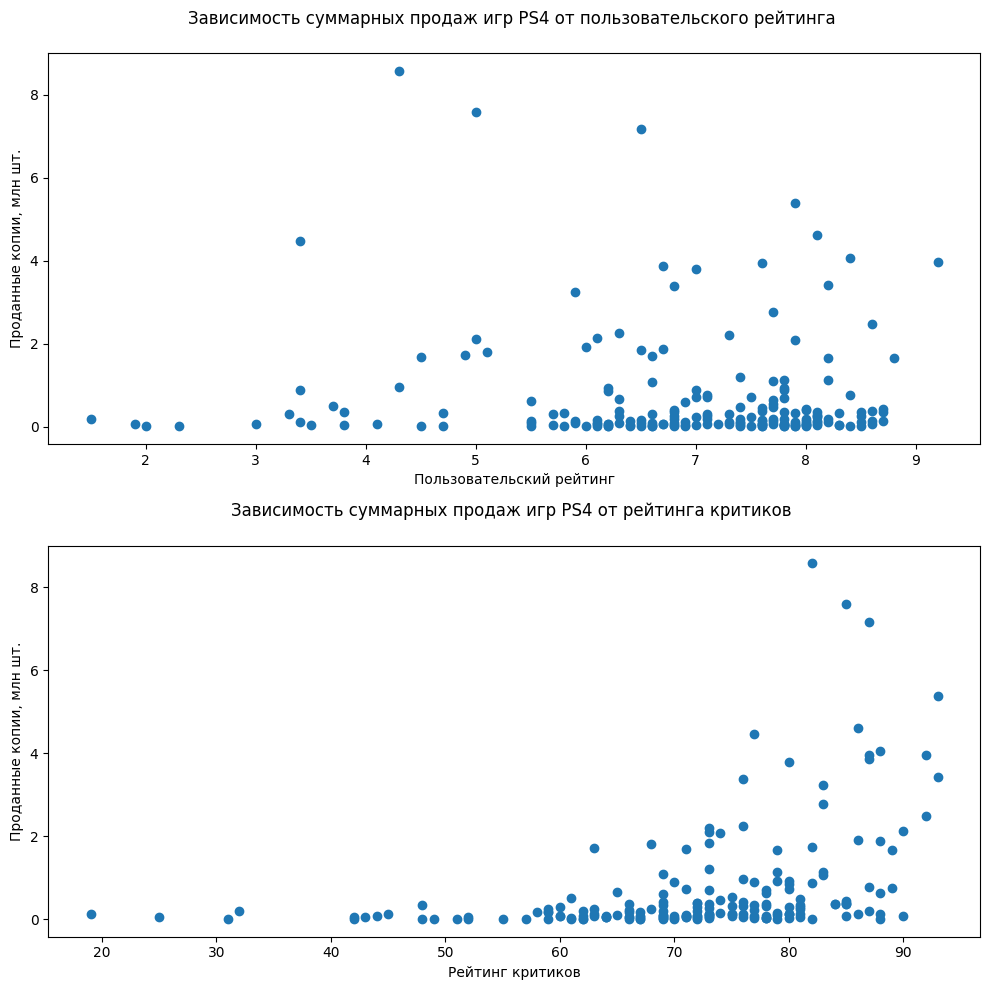

In [46]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.set(tight_layout=True)

ax[0].scatter(df_actual.query('platform == "PS4" and user_score.isna() == False')['user_score'],
          df_actual.query('platform == "PS4" and user_score.isna() == False')['total_sales'])
ax[0].set(title='Зависимость суммарных продаж игр PS4 от пользовательского рейтинга \n', 
          ylabel='Проданные копии, млн шт.',
          xlabel='Пользовательский рейтинг')

ax[1].scatter(df_actual.query('platform == "PS4" and critic_score.isna() == False')['critic_score'],
          df_actual.query('platform == "PS4" and critic_score.isna() == False')['total_sales'])
ax[1].set(title='Зависимость суммарных продаж игр PS4 от рейтинга критиков \n', 
          ylabel='Проданные копии, млн шт.',
          xlabel='Рейтинг критиков')

plt.show()

In [47]:
corr_table = (df_actual.query('platform == "PS4"')
                       .loc[:, ['total_sales', 'critic_score', 'user_score']]
                       .corr()
                       .loc['total_sales', ['critic_score', 'user_score', ]]
                       .to_frame()
                       )


for i in ['WiiU', 'XOne', '3DS', 'PC']:
    corr_table[i] = (df_actual.query('platform == @i')
                       .loc[:, ['total_sales', 'critic_score', 'user_score']]
                       .corr()
                       .loc['total_sales', ['critic_score', 'user_score', ]]
                       .to_frame()['total_sales'])

print('Коэффициенты корреляции общих продаж игр для платформ')
corr_table = corr_table.rename(columns={'total_sales':'PS4'},
                                index={'critic_score':'Рейтинг критиков',
                                       'user_score':'Пользовательский рейтинг'})
display(corr_table)

Коэффициенты корреляции общих продаж игр для платформ


,PS4,WiiU,XOne,3DS,PC
Рейтинг критиков,0.39,0.32,0.43,0.18,0.38
Пользовательский рейтинг,-0.06,0.36,-0.04,0.20,0.15


Анализ коэффициентов корреляции позволяет сделать вывод о том, что пользовательский рейтинг и рейтинг критиков слабо коррелируют с продажами, однако, любопытно, что для платформ `PS4`, `XOne` и `PC` корреляция с рейтингом критиков стабильнее корреляции с рейтингом пользователей, а для платформ `WiiU` и `3DS` наоборот

Рассмотрим средние и медианные рейтинги критиков для платформ:

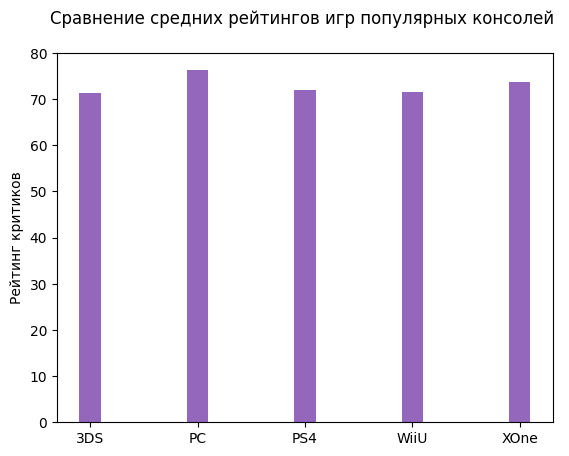

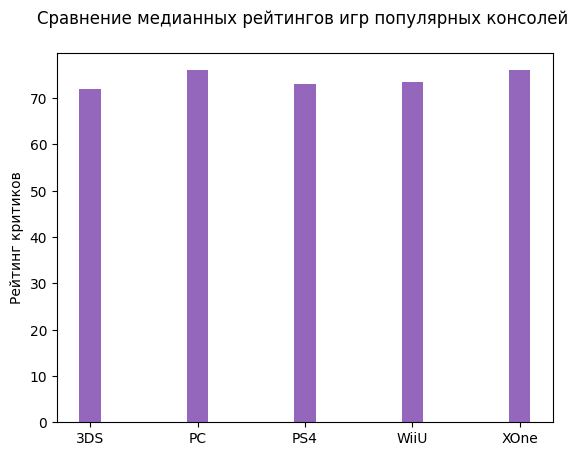

In [48]:
fig, ax = plt.subplots()


pivot_i = df_actual.query('platform in ["PS4", "WiiU", "XOne", "3DS", "PC"]').pivot_table(index='platform', 
                              values='critic_score', 
                              aggfunc=['mean', 'median'])

for i in ['PS4', 'WiiU', 'XOne', '3DS', 'PC']:    
    ax.bar(pivot_i.index, pivot_i['mean']['critic_score'], label = i, width = 0.2)
 
ax.set_title('Сравнение средних рейтингов игр популярных консолей \n')
ax.set_ylabel('Рейтинг критиков')
plt.show()

fig1, ax1 = plt.subplots()

for i in ['PS4', 'WiiU', 'XOne', '3DS', 'PC']:    
    ax1.bar(pivot_i.index, pivot_i['median']['critic_score'], label = i, width = 0.2)
 
ax1.set_title('Сравнение медианных рейтингов игр популярных консолей \n')
ax1.set_ylabel('Рейтинг критиков')
plt.show()

Сравнение средних рейтингов игр не позволяет подтвердить гипотезу о том, что хороших отзывов критиков для успешности игры достаточно  -- средние рейтинги по консолям примерно равны

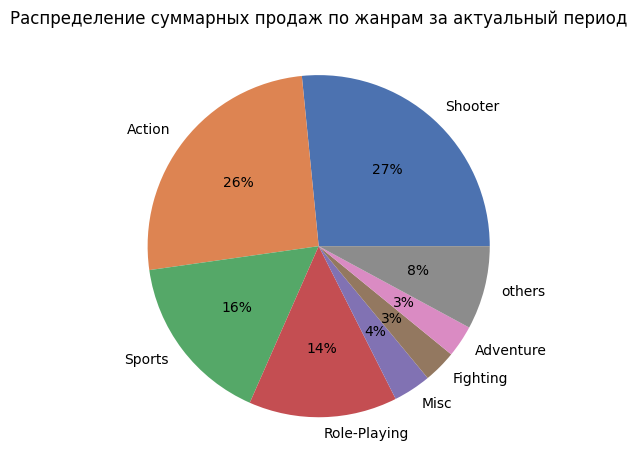

,genre,total_sales
0,Shooter,105.73
1,Action,102.13
2,Sports,64.33
3,Role-Playing,55.82
4,Misc,14.17
5,Fighting,12.37
6,Adventure,11.98
7,others,31.39


In [49]:
genres_share = (df_actual
 .groupby('genre', as_index=False)['total_sales']
 .sum()
 .sort_values(by='total_sales', 
              ascending=False)
 .reset_index(drop=True))

other_genres = genres_share.loc[7:, 'total_sales'].sum()
genres_share = genres_share.loc[:6, :]
genres_share.loc[7, 'genre'] = 'others'
genres_share.loc[7, 'total_sales'] = other_genres

fig, ax = plt.subplots()
fig.set(tight_layout=True);
ax.pie(genres_share.total_sales, labels=genres_share.genre, colors=colors, autopct='%1.0f%%')
ax.set(ylabel=None, title='Распределение суммарных продаж по жанрам за актуальный период')

plt.show()

genres_share

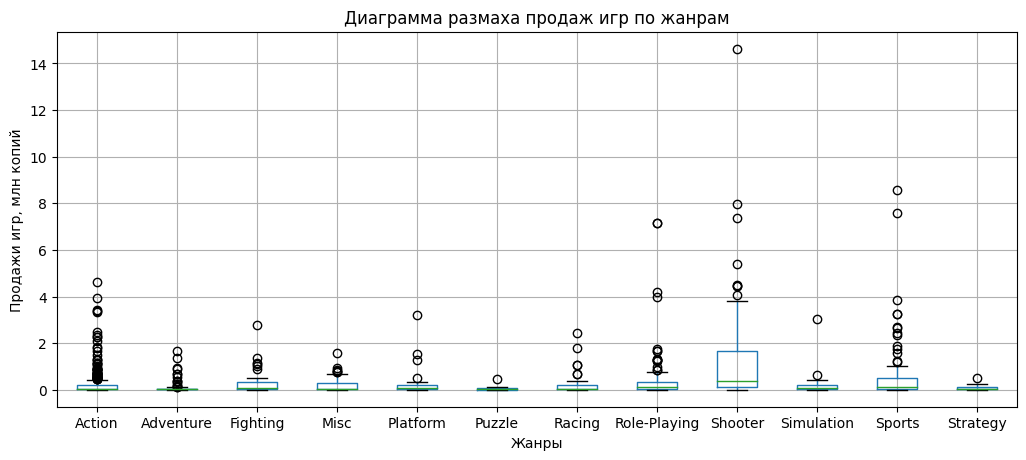

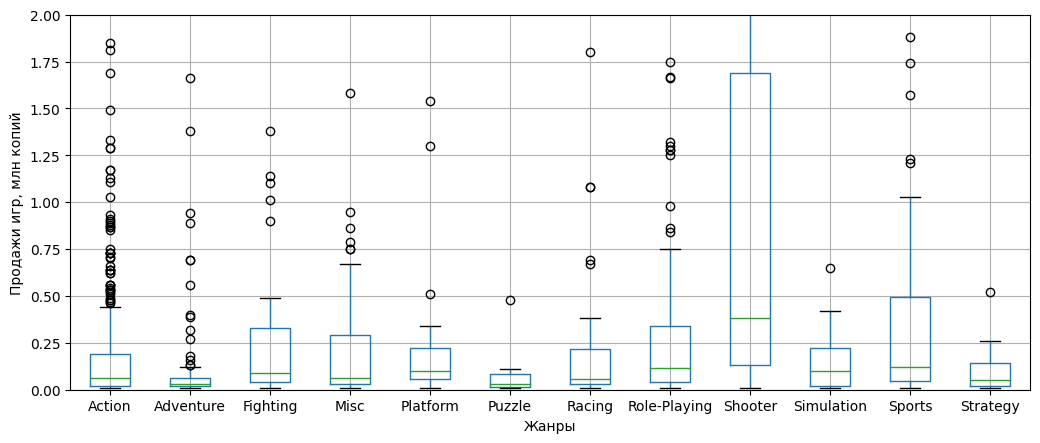

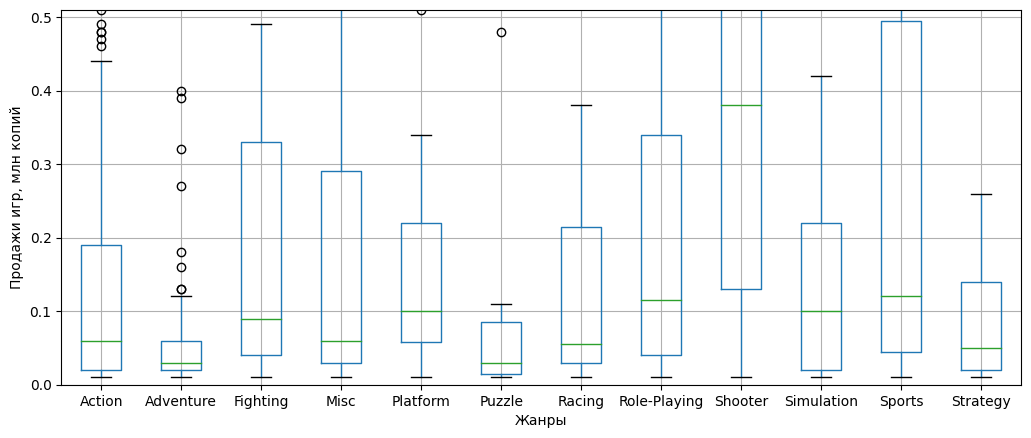

In [50]:
df_actual.boxplot(column='total_sales', by='genre', figsize=(12,5))
plt.title('Диаграмма размаха продаж игр по жанрам')
plt.suptitle(None)
plt.ylabel('Продажи игр, млн копий')
plt.xlabel('Жанры')
plt.show()

df_actual.boxplot(column='total_sales', by='genre', figsize=(12,5))
plt.title(None)
plt.suptitle(None)
plt.ylabel('Продажи игр, млн копий')
plt.xlabel('Жанры')
plt.ylim(0, 2)
plt.show()

df_actual.boxplot(column='total_sales', by='genre', figsize=(12,5))
plt.title(None)
plt.suptitle(None)
plt.ylabel('Продажи игр, млн копий')
plt.xlabel('Жанры')
plt.ylim(0, .51)
plt.show()

- Самые популярные жанры -- экшн и шутеры, суммарно они занимают половину величины рынка актуального периода. Спортивные и ролевые игры составляют 16 - 14 % всех продаж и являются следующими по популярности

- Наименее популярные жанры: паззлы, стратегии, симуляторы -- их совокупная доля составила ~ 10 % от рынка

- Анализ диаграмм размаха позволяет утверждать, что самый популярный жанр -- шутер, у это жанра самые большие значения квартилей .25, .50 и .75, в сравнении с шутерами остальные жанры далеко позади

- На втором месте по привлекательности для продвижения находятся спортивные игры с самыми большими .75-квартилем и .50-квартилем из оставшихся

- Также заслуживают внимания ролевые игры и файтинги, имеющие примерно одинаковую привлекательность, но уступающие спортивным играм

### **Вывод**

В ходе исследовательского анализа данных сделаны следующие выводы:


- Анализ динамики выхода игр во времени позволяет утверждать, что актуальным интервалом времени для прогнозирования 2017 года является интервал с 2013 по 2016 год -- в 2013 году просматривается выход в новый период по динамике выхода игр

- Для целей прогнозирования 2017 года следует взять два последних года -- 2015 и 2016

- Медианное время поддержки платформы производителем составляет шесть лет, однако, новые поколения выходят до прекращения обслуживания старых

- Лидерами по продажам за актуальный период являются консоли `PS4`, `XOne` и `3DS`

- В ходе анализа подготовлен рейтинг предпочтительности продвижения платформ:
    
1) `WiiU`
2) `XOne`
3) `PS4`
4) `3DS`
5) `PC` 


- Исследование не выявило связи между рейтингом пользователей/критиков и продажами игр

- Наиболее прибыльный жанр игр -- шутеры, на втором месте со значительным отрывом спортивные игры, третье место делят ролевые игры и файтинги

## Портрет пользователя по регионам

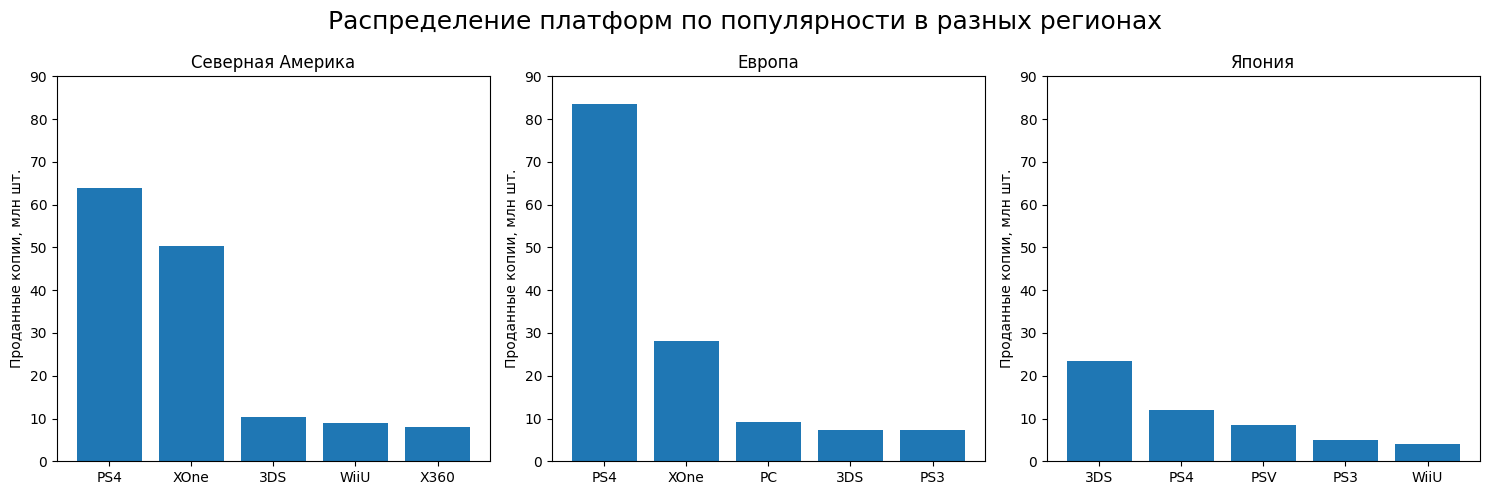

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)
fig.suptitle('Распределение платформ по популярности в разных регионах', fontsize=18)
fig.set(tight_layout=True)
list_of_titles = ['Северная Америка', 'Европа', 'Япония']
counter = 0
for i in ['na_sales', 'eu_sales', 'jp_sales']:

        pivot_i = (df_actual.pivot_table(index='platform', 
                                    values=i, 
                                    aggfunc='sum')
                        .sort_values(by=i, ascending=False)
                        .head()
)
        ax[counter].set_title(list_of_titles[counter])
        ax[counter].bar(pivot_i.index, pivot_i[i])
        ax[counter].set_ylabel('Проданные копии, млн шт.')
        ax[counter].set_ylim(0, 90)
        counter += 1  

plt.show()

- Наибольшую популярность в Северной Америке и Европе в актуальный период имеют консоли Sony и Microsoft, самая популярная консоль -- `PS4`
- В Европе виден значительный отрыв `PS4` от основного конкурента -- `XOne`
- В Северной Америке столь значительного отрыва не наблюдается -- `PS4` все также на первом месте, однако, отрыв от конкурента меньше
- В Европе платформа `PC` гораздо популярнее, чем в Северной Америке и находится на третьем месте, в Северной Америке `PC` не входит в топ-5
- В Северной Америке консоль `3DS` находится на третьем месте по популярности, а в Европе `3DS` уступает место `PC` и находится на четвертом
- Распределение популярности платформ в Японии коренным образом отличается: наиболее популярная платформа здесь `3DS` от Nintendo, вся пятерка лидеров -- платформы японских компаний Nintendo и Sony
- Можно утверждать, что в Японии ценятся мобильные решения -- первое и третье место топ-5 занимают носимые игровые консоли: `3DS` и `PSV`, при этом `PSV` не входит в топ-5 ни в Северной Америке, ни в Европе
- Следует отметить, что консоли Microsoft в Японии малопопулярны и не входят в топ-5

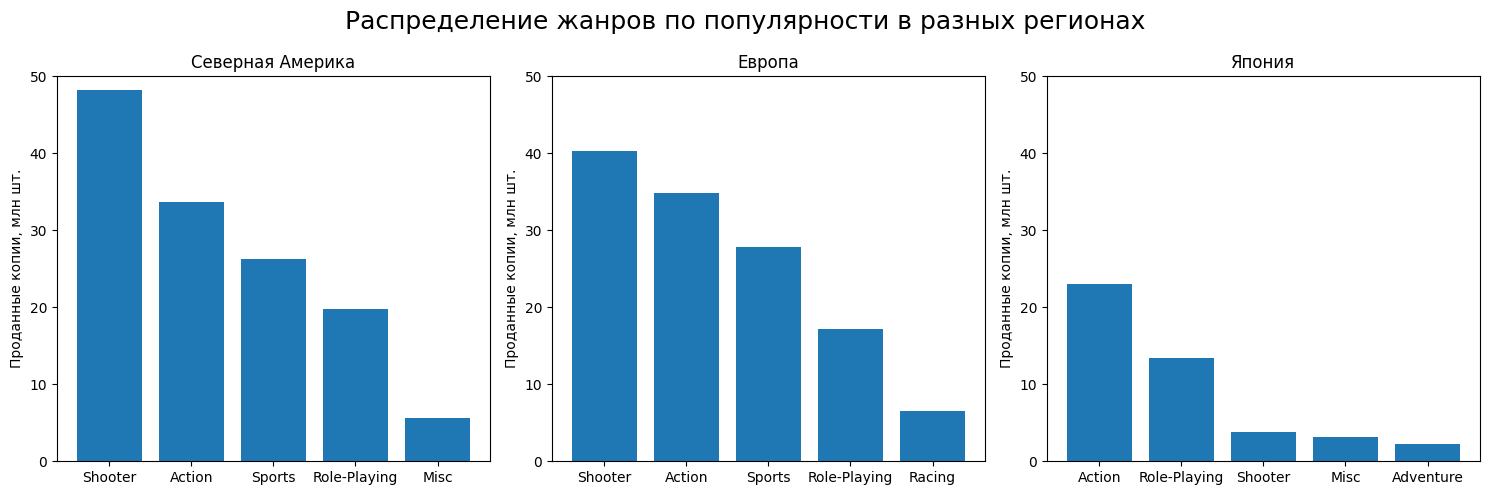

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)
fig.suptitle('Распределение жанров по популярности в разных регионах', fontsize=18)
fig.set(tight_layout=True)
list_of_titles = ['Северная Америка', 'Европа', 'Япония']

counter = 0
for i in ['na_sales', 'eu_sales', 'jp_sales']:

        pivot_i = (df_actual.pivot_table(index='genre', 
                                    values=i, 
                                    aggfunc='sum')
                        .sort_values(by=i, ascending=False)
                        .head()
)
        ax[counter].set_title(list_of_titles[counter])
        ax[counter].bar(pivot_i.index, pivot_i[i])
        ax[counter].set_ylabel('Проданные копии, млн шт.')
        ax[counter].set_ylim(0, 50)
        counter += 1
    
plt.show();

- В Северной Америке и Европе распределение популярности жанров игр практически совпадает: самые популярные жанры -- шутер и экшн, затем спортивные и ролевые игры
- Последнее место в топ-5 в Северной Америке занимает категория "другое", а в Европе категория "гонки"
- В Японии ситуация вновь кардинально отличается: самый популярный жанр здесь экшн, на втором месте ролевые игры, шутеры в Японии на третьем месте, предпоследняя в топ-5 категория "другое" и замыкает пятерку жанр приключений
- Следует отметить, что спортивные игры в Японии не представлены в топ-5
- Можно утверждать, что различие предпочтений в жанрах продиктовано большим отличием культуры Японии от Европы и Северной Америки, чем отличие между Европой и Северной Америкой, скорее всего, в Японии ценят совсем другие составляющие игр, например: продуманный мир, возможность отыгрыша, сложные механики и так далее; в то время, как в Европе и Северной Америке больше ценят кинематографичность, динамичный геймплей и возможность совместной игры с партнером (спортивные игры)

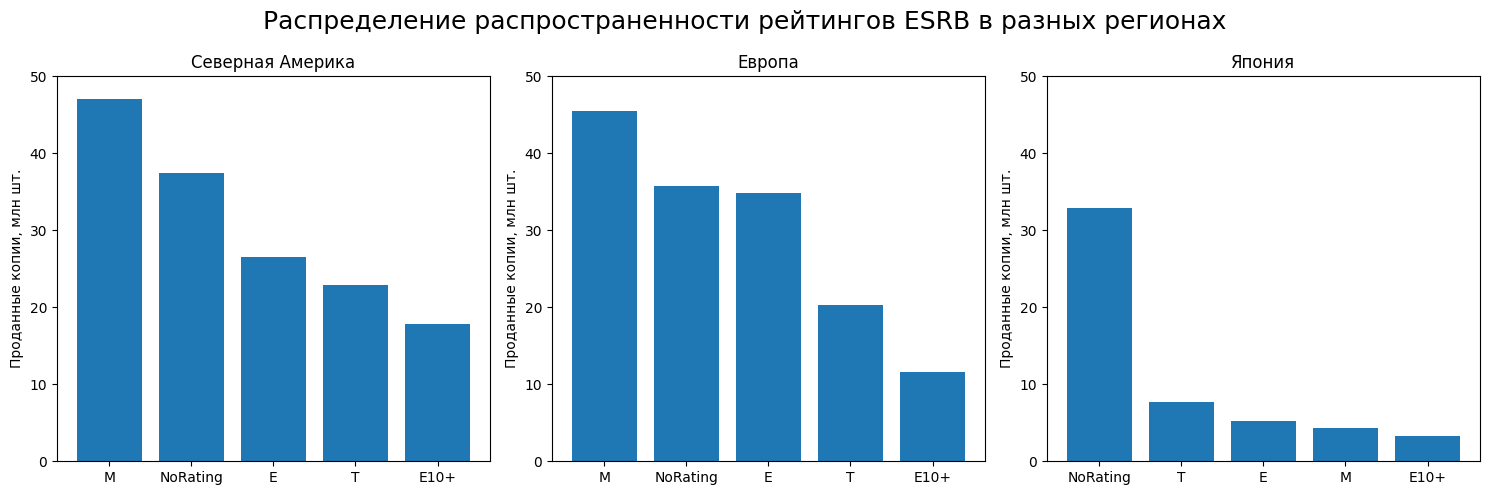

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)
fig.suptitle('Распределение распространенности рейтингов ESRB в разных регионах', fontsize=18)
fig.set(tight_layout=True)
list_of_titles = ['Северная Америка', 'Европа', 'Япония']
counter = 0
for i in ['na_sales', 'eu_sales', 'jp_sales']:

        pivot_i = (df_actual.pivot_table(index='rating', 
                                    values=i, 
                                    aggfunc='sum')
                        .sort_values(by=i, ascending=False)
                        
)
        ax[counter].set_title(list_of_titles[counter])
        ax[counter].bar(pivot_i.index, pivot_i[i])
        ax[counter].set_ylabel('Проданные копии, млн шт.')
        ax[counter].set_ylim(0, 50)
        counter += 1
    
        

plt.show();

- Северная америка и Европа идентичны в распределении популярности игр определенного возрастного рейтинга ESRB
- Наиболее продаваемая категория игр в Японии -- это игры без рейтинга ESRB, по всей видимости это связано с тем, что этот рейтинг в большей степени связан с издателями из Северной Америки, можем предположить, что в Японии наибольшей популярностью пользуются игры, производимые на внутреннем рынке
- В Северной Америке и Европе категория игр без рейтинга ESRB является второй по популярности, но с меньшим отрывом от остальных категорий в сравнении с Японией, можем предположить, что в Северной Америке и Европе покупают далеко не только игры внутреннего рынка, но и в значительной степени игры остального мира

### **Вывод**

Изучение портрета среднего игрока по регионам показало необходимость региональной настройки продвижения игр:

- В зависимости от региона меняется популярность игровых платформ: например в Японии самой популярной платформой является `3DS`, в то время, как в Европе и Северной Америке эта консоль занимает третье-четвертое место, уступая конкурентам; доминирование консолей Sony в Европе очевидно, а в Северной Америке это не совсем так; наконец, платформа `PC` в топ-5 только в Европе


- В разных регионах популярны различные игровые жанры: в Европе и Северной Америке наиболее популярны шутеры и экшены, в то время как в Японии лидируют экшены и ролевые игры, при этом спортивные игры в Японии не представлены в топ-5, а в Европе и Северной Америке этот жанр на третьем месте; гоночные игры входят в топ-5 только в Европе


- Следует обращать вниманание на параметр возрастного рейтинга: в то время, как для Европы и Северной Америки распределение покупок по возрастным рейтингам совпадает, в Японии ситуация кардинально отличается; на основании количества приобретенных игр без рейтинга ESRB можно утверждать, что в Японии больше предпочитают приобретать местную продукцию, в отличие от Европы и Северной Америки
 

## Проверка гипотез

### Рейтинг платформ

In [54]:
df_actual.query('platform == "PC"')['user_score'].describe()

count   84.00
mean     6.30
std      1.76
min      1.40
25%      5.02
50%      6.90
75%      7.60
max      9.30
Name: user_score, dtype: float64

In [55]:
df_actual.query('platform == "XOne"')['user_score'].describe()

count   121.00
mean      6.54
std       1.46
min       1.60
25%       5.80
50%       6.70
75%       7.70
max       9.20
Name: user_score, dtype: float64

- Размеры выборок достаточны для нормального распределения выборочных средних относительно средних генеральных совокупностей
- Размеры выборок отличаются, как и стандартные отклонения, необходимо указать на неравенство дисперсий генеральных совокупностей при проведении t-теста

**Нулевая гипотеза**: среднее генеральной совокупности пользовательских оценок на `PC` **равно** среднему генеральной совокупности пользовательских оценок на `Xbox One`

**Альтернативная гипотеза**: средние пользовательские рейтинги платформ `Xbox One` и `PC` **отличаются**

In [56]:
XOne_user_score = df_actual.query('platform == "XOne" and user_score.isna() == False')['user_score']
PC_user_score = df_actual.query('platform == "PC" and user_score.isna() == False')['user_score']


results = st.ttest_ind(XOne_user_score, PC_user_score, equal_var=False)

alpha = .05

print(f'p-value: {results.pvalue:.1%}, alpha: {alpha:.1%}')
if results.pvalue < alpha:
    print('+ отвергаем нулевую гипотезу')
else: print('- не получилось отвергнуть нулевую гипотезу')

p-value: 29.5%, alpha: 5.0%
- не получилось отвергнуть нулевую гипотезу


Вероятность ошибиться при отказе от нулевой гипотезы значительно выше принятого уровня статистической значимости: **не удалось отвергнуть нулевую гипотезу**

### Рейтинг жанров

In [57]:
df_actual.query('genre == "Action"')['user_score'].describe()

count   193.00
mean      6.81
std       1.35
min       2.00
25%       6.30
50%       7.10
75%       7.70
max       9.00
Name: user_score, dtype: float64

In [58]:
df_actual.query('genre == "Sports"')['user_score'].describe()

count   82.00
mean     5.20
std      1.97
min      0.20
25%      3.85
50%      5.55
75%      6.60
max      8.80
Name: user_score, dtype: float64

- Размеры выборок достаточны для нормального распределения выборочных средних относительно средних генеральных совокупностей
- Размеры выборок отличаются, как и стандартные отклонения, необходимо указать на неравенство дисперсий генеральных совокупностей при проведении t-теста

**Нулевая гипотеза**: среднее генеральной совокупности пользовательских оценок жанра `Action` **равно** среднему генеральной совокупности пользовательских оценок жанра `Sports`

**Альтернативная гипотеза**: средние пользовательские рейтинги  жанра `Action` и  жанра `Sports` **отличаются**

In [59]:
XOne_user_score = df_actual.query('genre == "Action" and user_score.isna() == False')['user_score']
PC_user_score = df_actual.query('genre == "Sports" and user_score.isna() == False')['user_score']


results = st.ttest_ind(XOne_user_score, PC_user_score, equal_var=False)

alpha = .05

print(f'p-value: {results.pvalue:.1e}, alpha: {alpha:.2f}')
if results.pvalue < alpha:
    print('+ отвергаем нулевую гипотезу')
else: print('- не получилось отвергнуть нулевую гипотезу')

p-value: 6.0e-10, alpha: 0.05
+ отвергаем нулевую гипотезу


Вероятность ошибиться при отказе от нулевой гипотезы значительно ниже принятого уровня статистической значимости: **отвергаем нулевую гипотезу**

### **Вывод**

- Предел статистической значимости принят на уровне `5 %`
- Проверка гипотез проведена на основании сравнения принятой величины статистической значимости и `p-value`, полученного в ходе выполнения двустороннего t-теста
- Не удалось отвергнуть гипотезу о равенстве рейтингов `PC` и `XOne`
- В ходе тестирования гипотеза о равенстве рейтингов `Action` и `Sports` отвергнута

## **Общий вывод**

**Предобработка данных**


В ходе предобработки данных проделано следующее:


- Названия столбцов приведены к нижнему регистру
- Удалены строки без имени игры или без года релиза
- В столбце `user_score` значения `tbd` заменены пустыми значениями
- В столбце `user_score` тип данных изменен с `object` на `float`
- Тип данных столбца `year_of_release` изменен с `float` на `int`
- Произведены замены устаревших рейтингов (`K-A` и `EC`)
- Пропуски возрастного рейтинга заполнены значением `NoRating`
- Единственное значение возрастного рейтинга `RP` заменено на пустое значение
- Проведена проверка на неявные/явные дубликаты и аномальные значения -- значений не обнаружено
- Рассчитаны суммарные продажи по миру для каждой игры как сумма продаж по регионам


**Анализ данных**


В ходе исследовательского анализа данных сделаны следующие выводы:


- Анализ динамики выхода игр во времени позволяет утверждать, что актуальным интервалом времени для прогнозирования 2017 года является интервал с 2013 по 2016 год -- в 2013 году просматривается выход в новый период по динамике выхода игр

- Для целей прогнозирования 2017 года следует взять два последних года -- 2015 и 2016

- Медианное время поддержки платформы производителем составляет шесть лет, однако, новые поколения выходят до прекращения обслуживания старых

- Лидерами по продажам за актуальный период являются консоли `PS4`, `XOne` и `3DS`

- В ходе анализа подготовлен рейтинг предпочтительности продвижения платформ:
    
1) `WiiU`
2) `XOne`
3) `PS4`
4) `3DS`
5) `PC` 


- Исследование не выявило связи между рейтингом пользователей/критиков и продажами игр

- Наиболее прибыльный жанр игр -- шутеры, на втором месте со значительным отрывом спортивные игры, третье место делят ролевые игры и файтинги



**Портрет среднего игрока по регионам**


Изучение портрета среднего игрока по регионам показало необходимость региональной настройки продвижения игр:

- В зависимости от региона меняется популярность игровых платформ: например в Японии самой популярной платформой является `3DS`, в то время, как в Европе и Северной Америке эта консоль занимает третье-четвертое место, уступая конкурентам; доминирование консолей Sony в Европе очевидно, а в Северной Америке это не совсем так; наконец, платформа `PC` в топ-5 только в Европе

- В разных регионах популярны различные игровые жанры: в Европе и Северной Америке наиболее популярны шутеры и экшены, в то время как в Японии лидируют экшены и ролевые игры, при этом спортивные игры в Японии не представлены в топ-5, а в Европе и Северной Америке этот жанр на третьем месте; гоночные игры входят в топ-5 только в Европе

- Следует обращать вниманание на параметр возрастного рейтинга: в то время, как для Европы и Северной Америки распределение покупок по возрастным рейтингам совпадает, в Японии ситуация кардинально отличается; на основании количества приобретенных игр без рейтинга ESRB можно утверждать, что в Японии больше предпочитают приобретать местную продукцию, в отличие от Европы и Северной Америки
 




**Проверка гипотез**


- Предел статистической значимости принят на уровне `5 %`
- Проверка гипотез проведена на основании сравнения принятой величины статистической значимости и `p-value`, полученного в ходе выполнения двустороннего t-теста
- Не удалось отвергнуть гипотезу о равенстве рейтингов `PC` и `XOne`
- В ходе тестирования гипотеза о равенстве рейтингов `Action` и `Sports` отвергнута


**Основные рекомендации**  

При планировании рекламной кампании рекомендуется в первую очередь ориентироваться на регион пользователя, которому будет отображаться реклама: в зависимости от региона следует определиться со списком платформ, жанров и возрастных рейтингов. Список предлагается формировать исходя из рейтинга популярности в этих категориях, а также из рекламного бюджета

